## Analyse Hauptnutzfläche / Geschossfläche

In [117]:
import seaborn as sns
import src.package.importer as im
import src.package.consts as c
import src.package.charts as charts
import src.package.importer_usages as imp_usg
import src.analysis.feature_engineering.garages as grg
import pandas as pd

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_extended_dataset('../package/datasets/full_dataset.csv', cluster_threshold=10)
df, usages = imp_usg.extract_usage_details(df)
filtered_df = im.select_relevant_features(df)

### Allgemein

In [118]:
filtered_df[c.FIELD_AREA_MAIN_USAGE].describe()

count      419.000000
mean      3269.632458
std       4310.445809
min         75.000000
25%        719.500000
50%       1602.000000
75%       4049.500000
max      29437.000000
Name: area_main_usage, dtype: float64

In [119]:
filtered_df[c.FIELD_AREA_TOTAL_FLOOR_416].describe()

count      894.000000
mean      6384.539150
std       8584.172628
min         50.000000
25%       1423.250000
50%       3420.500000
75%       7695.000000
max      75328.000000
Name: area_total_floor_416, dtype: float64

### Visualisierungen
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.

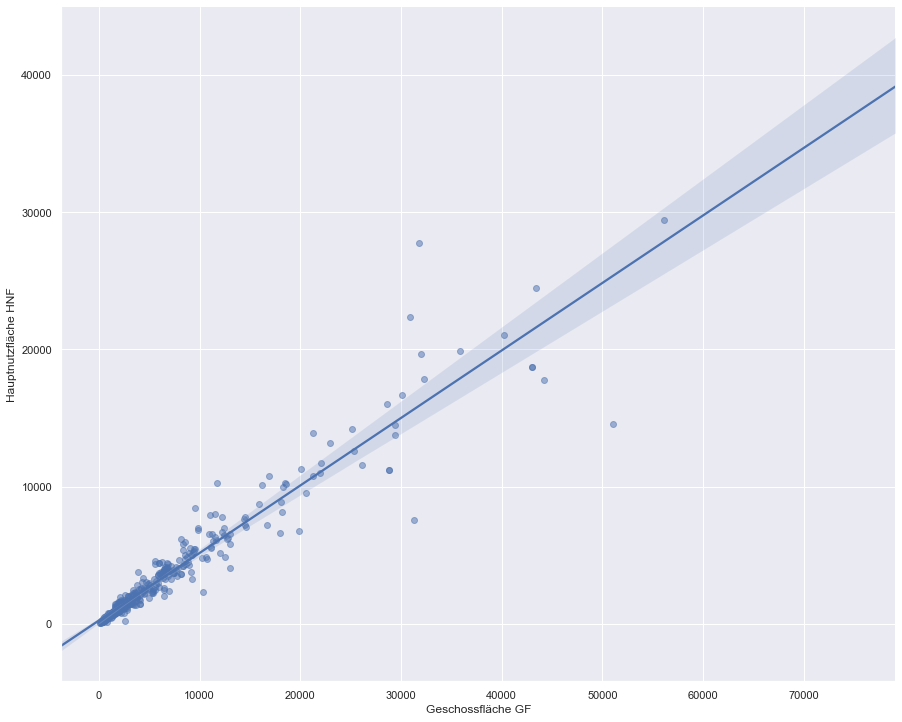

In [120]:
charts.lmplot_gf_hnf(filtered_df)

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF'>

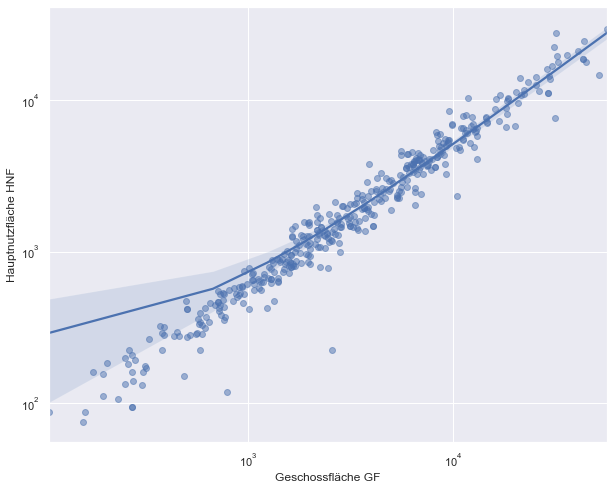

In [121]:
charts.regplot_gf_hnf(filtered_df, logscale=True)

#### 75% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:90: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


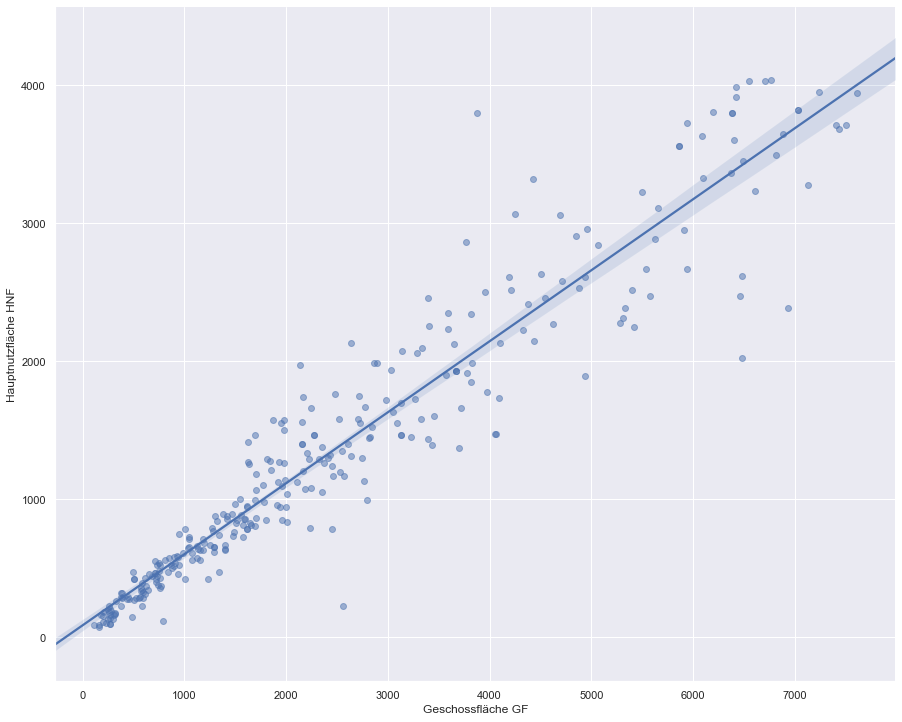

In [122]:
df_75_percentile = im.cap_upper_gf_hnf(filtered_df)
gf = charts.lmplot_gf_hnf(df_75_percentile)

# Save figure
gf.savefig("exports/lmplot_hnf_gf_ratio_75percentile.png", dpi=200)

#### 25% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:90: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


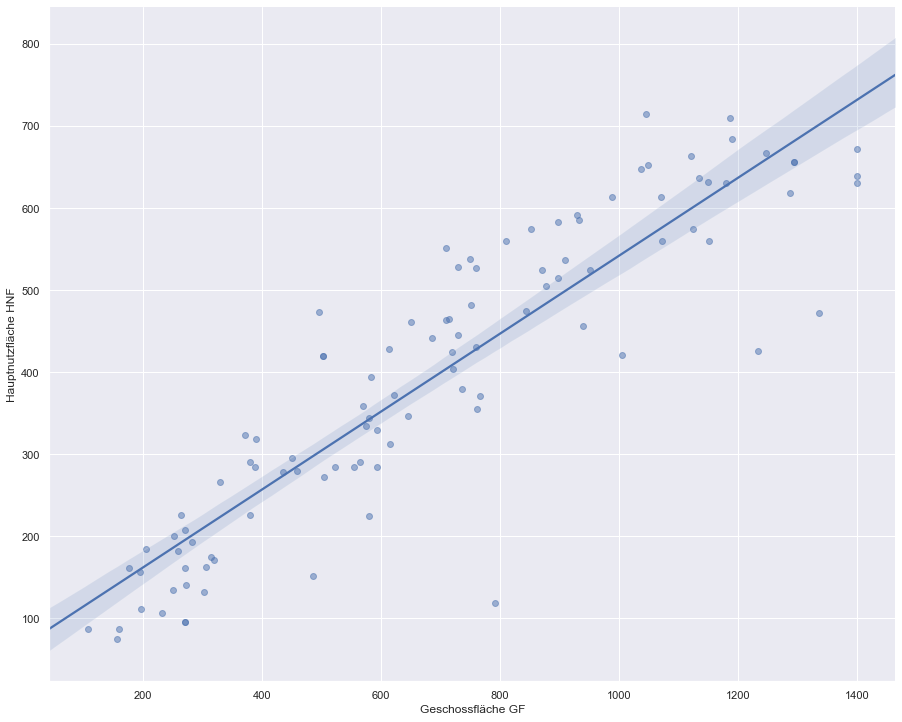

In [123]:
df_25_percentile = im.cap_upper_gf_hnf(filtered_df, upper_percentile='25%')
gf = charts.lmplot_gf_hnf(df_25_percentile)

# Save figure
# gf.savefig("exports/lmplot_hnf_gf_ratio_25percentile.png", dpi=200)

#### Clustering
Ausgenommen: ["TECHNIK", "GESUNDHEIT", "OFFENE_BAUTEN"]

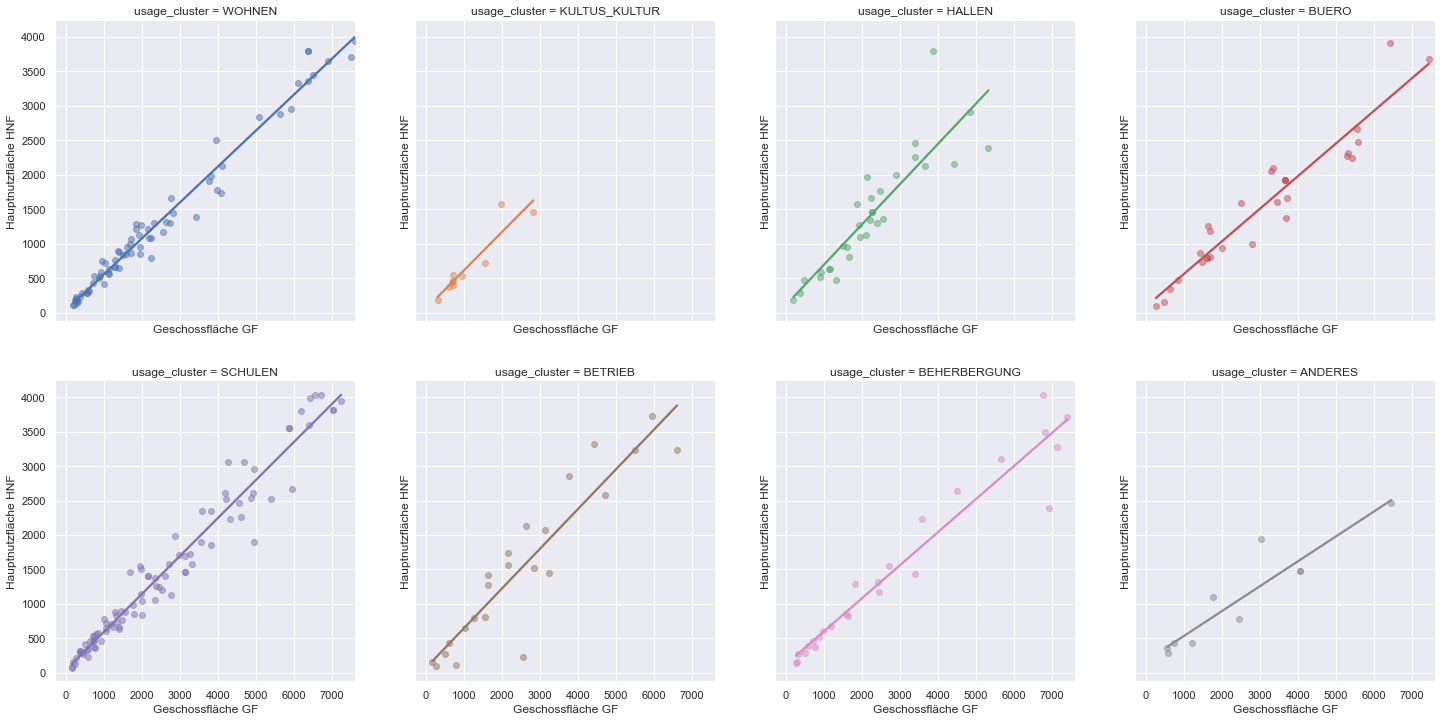

In [124]:
import matplotlib.pyplot as plt

clusters_to_remove = ["TECHNIK", "GESUNDHEIT", "OFFENE_BAUTEN"]
df_75_percentile.drop(df_75_percentile[df_75_percentile[c.FIELD_USAGE_CLUSTER].isin(clusters_to_remove)].index, inplace=True)

gf = sns.lmplot(
    data=df_75_percentile,
    x=c.FIELD_AREA_TOTAL_FLOOR_416, y=c.FIELD_AREA_MAIN_USAGE,
    col=c.FIELD_USAGE_CLUSTER,
    hue=c.FIELD_USAGE_CLUSTER,
    scatter_kws={'alpha':0.5},
    ci=None, col_wrap=4,
)

gf.set(xlabel=charts.LABEL_GF, ylabel=charts.LABEL_HNF)
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Save figure
gf.savefig("exports/lmplot_hnf_gf_ratio_75percentile_clustered.png", dpi=200)

## Benchmarks HNF – GF
Benchmarks zu den Ratios HNF-GF – nach Cluster.<br>
Ausgenommen: ["TECHNIK", "GESUNDHEIT", "OFFENE_BAUTEN"]

### Catplot

,count,mean,std,min,25%,40%,50%,75%,max
usage_cluster,,,,,,,,,
ANDERES,10.0,0.470960,0.130991,0.319575,0.363234,0.375004,0.431123,0.607308,0.637772
BEHERBERGUNG,29.0,0.543177,0.100335,0.344300,0.483703,0.516139,0.543245,0.596336,0.806061
BETRIEB,31.0,0.588681,0.214915,0.088281,0.502303,0.587304,0.624879,0.741227,0.914773
BUERO,39.0,0.508637,0.111978,0.311340,0.435128,0.473002,0.488228,0.583956,0.765244
GESUNDHEIT,10.0,0.452464,0.120911,0.284932,0.352116,0.423634,0.463657,0.528969,0.642726
HALLEN,42.0,0.660330,0.149470,0.353293,0.561818,0.605061,0.643699,0.728445,0.979381
KULTUS_KULTUR,11.0,0.622698,0.109693,0.461196,0.553277,0.560333,0.598071,0.697885,0.793243
SCHULEN,106.0,0.585648,0.104825,0.383370,0.514091,0.543682,0.574546,0.640945,0.868280
WOHNEN,122.0,0.545469,0.077008,0.354176,0.498238,0.518673,0.541077,0.588057,0.859316


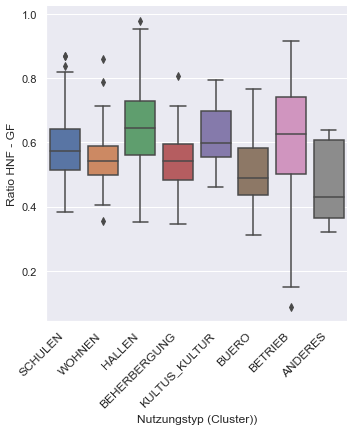

In [125]:
mask = df[c.FIELD_USAGE_CLUSTER].isin(clusters_to_remove)
plotData = df[~mask]
gf = sns.catplot(x=c.FIELD_USAGE_CLUSTER, y="ratio_hnf_gf", kind="box", data=plotData)

gf.set(xlabel='Nutzungstyp (Cluster))', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# Check different cluster sizes
df[c.FIELD_USAGE_CLUSTER] = df[c.FIELD_USAGE_CLUSTER].astype('category')
data = df[c.FIELD_HNF_GF_RATIO]
data.groupby(df[c.FIELD_USAGE_CLUSTER]).describe(percentiles=[.25, 0.4, .5, .75])

### Violinplot


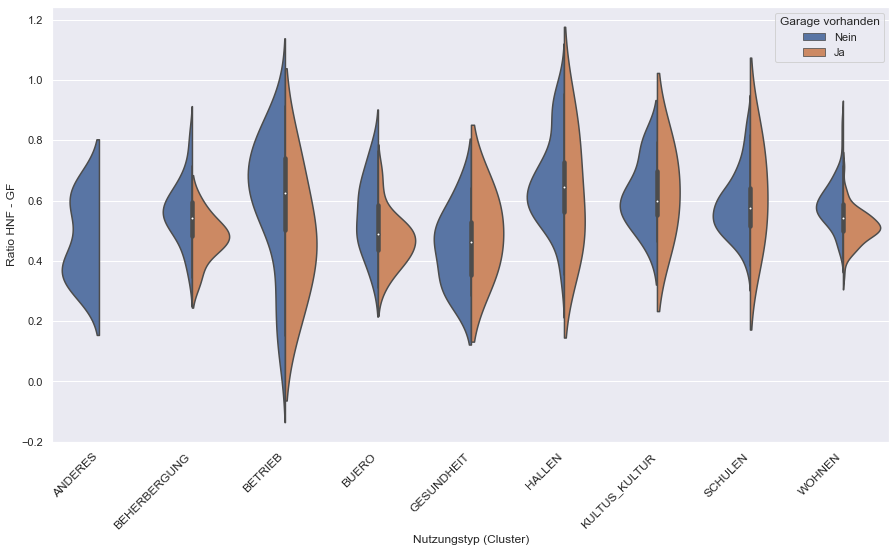

In [126]:
# Add Garage Present Field
plotData = grg.add_garage_present(df)

charts.set_plot_size(sns, rc=[15,8])
ax = sns.violinplot(x=c.FIELD_USAGE_CLUSTER, y="ratio_hnf_gf", hue=c.GARAGE_COMBINED_PRESENT, split=True, data=plotData)

ax.set(xlabel='Nutzungstyp (Cluster)', ylabel='Ratio HNF - GF')
ax.legend(title='Garage vorhanden', handles=ax.legend_.legendHandles, labels=['Nein', 'Ja'])

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# Save figure
gf.savefig("exports/violin_hnf_gf_garage_clustered.png", dpi=200)


Auswertung

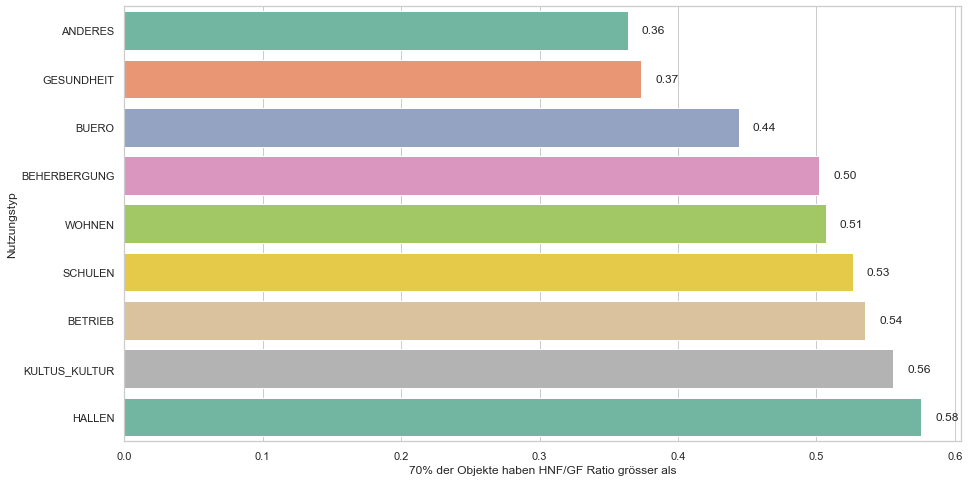

In [127]:
# preprocess data
percentiles = data.groupby(df[c.FIELD_USAGE_CLUSTER]).describe(percentiles=[.2, .3, .5, .7])
percentiles = percentiles[['30%', '50%', '70%']]
percentiles.columns = ['70%', '50%', '30%'] # Reversed percentiles are asked

# reshape and sort data
percentiles = percentiles.stack()
percentiles = percentiles.reset_index(level=[0,1])
percentiles.columns = [c.FIELD_USAGE_CLUSTER, 'percentile', 'ratio']
percentiles = percentiles[percentiles['percentile'] == '70%']

# Plot data
sns.set_style("whitegrid")
ax = sns.barplot(y=c.FIELD_USAGE_CLUSTER, x='ratio', data=percentiles, order=percentiles.sort_values('ratio')[c.FIELD_USAGE_CLUSTER], palette=sns.color_palette("Set2"))
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.01, # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
ax.set(xlabel='70% der Objekte haben HNF/GF Ratio grösser als', ylabel='Nutzungstyp')

# Save figure
gf.savefig("exports/barplot_hnf_gf_ratio_30percentile_reversed.png", dpi=200)